# Economic Data Analysis with Fred & Pandas

In [1]:
%pip install fredapi > /dev/null


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install plotly==5.19.0 matplotlib >/dev/null


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred
import config

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
fred_key = config.fred_api


# 1. Create the Fred Object

In [6]:
fred = Fred(api_key=fred_key)

# 2. Search for Economic Data!

In [12]:
sp_search = fred.search('S&P', order_by='popularity')

In [14]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-03-08,2024-03-08,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-03-06,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-07 08:43:02-06:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-03-08,2024-03-08,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-03-08,2024-03-08,S&P 500,2014-03-10,2024-03-07,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-03-07 19:10:57-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-03-08,2024-03-08,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-03-08,2024-03-08,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-03-06,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-07 08:43:06-06:00,82,This data represents the effective yield of th...


# 3. Pull Raw Data and Plot

<Axes: title={'center': 'S&P 500'}>

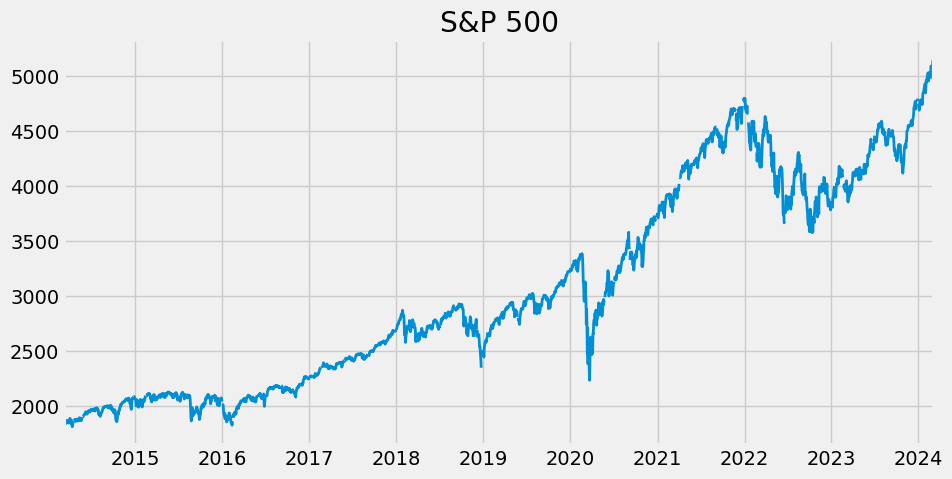

In [19]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [44]:
unempstate_results = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unempstate_results = unempstate_results.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unempstate_results.loc[unempstate_results.title.str.contains('Unemployment Rate')]

In [47]:
for myid in unemp_df.index:
    results = fred.get_series(myid)
    break

In [48]:
results

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-09-01    3.8
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
Length: 913, dtype: float64